
### Experiment 1: IBM Model with Parameter Variability
This simulation represents a standard IBM model incorporating variability in initial conditions and transmission parameters. It demonstrates the effect of parameter uncertainty on the progression of an infectious disease through a population, reflecting the natural variability observed in real-world scenarios.



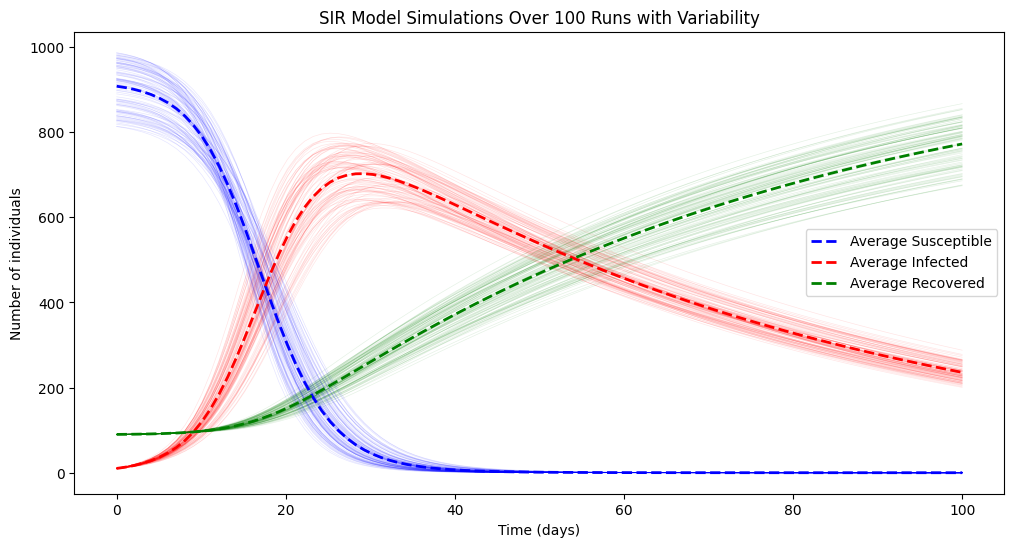

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the model
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Define base parameters
N = 1000  # Total population
D = 30.0  # Infections last seven days
gamma = 0.5 / D  # Recovery rate
beta = 0.3  # Infection rate
t = np.linspace(0, 100, 100)  # Time grid
S0 = 900  # Initial susceptible population
I0 = 10   # Initial infected population
R0 = 90   # Initial recovered population

# Run simulation 100 times with variability in parameters
num_runs = 100
all_S = np.zeros((num_runs, len(t)))
all_I = np.zeros((num_runs, len(t)))
all_R = np.zeros((num_runs, len(t)))

for run in range(num_runs):
    # Introduce variability in initial conditions and parameters
    S0_var = S0 * np.random.uniform(0.9, 1.1)
    I0_var = I0 * np.random.uniform(0.9, 1.1)
    R0_var = R0  # Usually, R0 is small or zero to start
    beta_var = beta * np.random.uniform(0.9, 1.1)
    gamma_var = gamma * np.random.uniform(0.9, 1.1)

    y0_var = S0_var, I0_var, R0_var
    ret = odeint(deriv, y0_var, t, args=(N, beta_var, gamma_var))
    all_S[run, :], all_I[run, :], all_R[run, :] = ret.T

# Calculate averages
average_S = np.mean(all_S, axis=0)
average_I = np.mean(all_I, axis=0)
average_R = np.mean(all_R, axis=0)

# Plotting
fig = plt.figure(figsize=(12, 6))

# Plot each run with very thin lines
for run in range(num_runs):
    plt.plot(t, all_S[run], 'b', alpha=0.1, linewidth=0.5)
    plt.plot(t, all_I[run], 'r', alpha=0.1, linewidth=0.5)
    plt.plot(t, all_R[run], 'g', alpha=0.1, linewidth=0.5)

# Plot the averages with thicker, dotted lines
plt.plot(t, average_S, 'b--', label='Average Susceptible', linewidth=2)
plt.plot(t, average_I, 'r--', label='Average Infected', linewidth=2)
plt.plot(t, average_R, 'g--', label='Average Recovered', linewidth=2)

plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('IBM Model Simulations Over 100 Runs with Variability')
plt.legend()
plt.show()


### Experiment 2: IBM and SIR Model Comparison
This experiment compares the outcomes of a traditional SIR model with an Individual-Based Model (IBM) that captures the randomness of individual interactions and disease transmission. It highlights the differences between aggregated differential equation models and stochastic agent-based simulations.


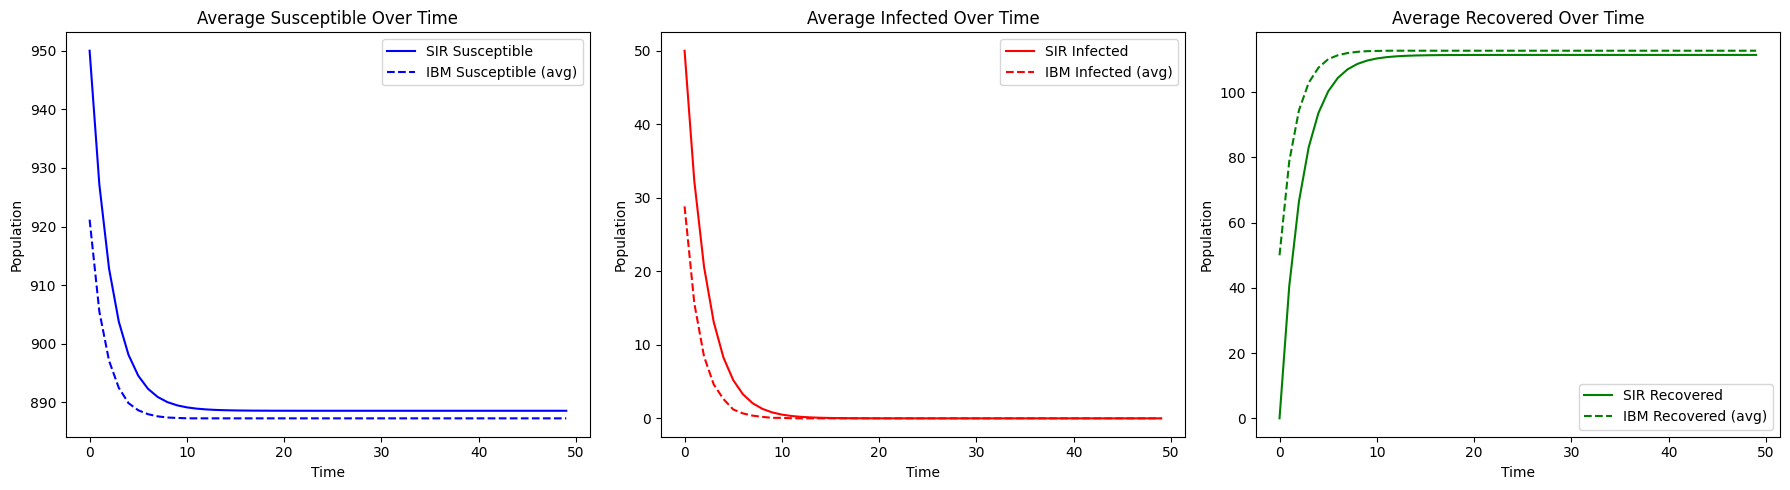

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random

def sir_model(y, t, N, sir_beta, sir_gamma):
    # SIR model differential equations.
    S, I, R = y
    dSdt = -sir_beta * S * I / N
    dIdt = sir_beta * S * I / N - sir_gamma * I
    dRdt = sir_gamma * I
    return dSdt, dIdt, dRdt

def ibm_simulation(N, initial_infected, ibm_beta, ibm_gamma, timesteps):
    # Individual-based model (IBM) simulation.
    susceptible, infected, recovered = N - initial_infected, initial_infected, 0
    for _ in range(timesteps):
        new_infections = sum(np.random.rand(susceptible) < (infected / N * ibm_beta))
        new_recoveries = sum(np.random.rand(infected) < ibm_gamma)
        susceptible -= new_infections
        infected = infected + new_infections - new_recoveries
        recovered += new_recoveries
        yield susceptible, infected, recovered

# Parameters for the SIR model
N = 1000  # Total population size. This is the sum of susceptible, infected, and recovered individuals.
sir_beta = 0.6  # Transmission rate of the SIR model. Represents the rate at which an infected individual comes into effective contact with susceptible individuals, potentially leading to new infections.
sir_gamma = 1.0  # Recovery rate of the SIR model. It is the rate at which infected individuals recover from the disease. The inverse of this rate represents the average duration an individual remains infected before recovering.
initial_infected = 50  # Initial number of infected individuals in the population at the start of the simulation. It assumes these are the only individuals who can spread the disease initially.
timesteps = 50  # The total number of time steps for which the simulation will run. Each timestep represents a unit of time (e.g., days) over which the disease spread and recovery processes evolve.

# Parameters for the IBM model
ibm_beta = 0.6  # Infection probability per contact in the IBM model. This is the probability that a susceptible individual gets infected upon contact with an infected individual.
ibm_gamma = 1.0  # Recovery probability in the IBM model. This represents the chance of an infected individual recovering during a timestep.
num_runs = 100  # Number of simulation runs for the IBM model. Multiple runs are performed to capture the inherent variability of the model's stochastic nature and to average the results for statistical significance.


# SIR model simulation
t = np.linspace(0, timesteps-1, timesteps)
y0 = N - initial_infected, initial_infected, 0
sir_results = odeint(sir_model, y0, t, args=(N, sir_beta, sir_gamma))
S_SIR, I_SIR, R_SIR = sir_results.T

# IBM model multiple runs simulation
all_S_IBM, all_I_IBM, all_R_IBM = [], [], []
for _ in range(num_runs):
    results = list(ibm_simulation(N, initial_infected, ibm_beta, ibm_gamma, timesteps))
    S, I, R = zip(*results)
    all_S_IBM.append(S)
    all_I_IBM.append(I)
    all_R_IBM.append(R)

# Calculate the average of each state over all runs
average_S_IBM = np.mean(all_S_IBM, axis=0)
average_I_IBM = np.mean(all_I_IBM, axis=0)
average_R_IBM = np.mean(all_R_IBM, axis=0)

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].plot(t, S_SIR, 'b', label='SIR Susceptible')
axes[0].plot(t, average_S_IBM, 'b--', label='IBM Susceptible (avg)')
axes[1].plot(t, I_SIR, 'r', label='SIR Infected')
axes[1].plot(t, average_I_IBM, 'r--', label='IBM Infected (avg)')
axes[2].plot(t, R_SIR, 'g', label='SIR Recovered')
axes[2].plot(t, average_R_IBM, 'g--', label='IBM Recovered (avg)')
for ax in axes:
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.legend()
axes[0].set_title('Average Susceptible Over Time')
axes[1].set_title('Average Infected Over Time')
axes[2].set_title('Average Recovered Over Time')
plt.tight_layout()
plt.show()


### Experiment 3: IBM Model with Dynamic Vaccination
The final experiment extends the IBM approach to include a dynamic vaccination strategy, simulating a real-world vaccination rollout with daily fluctuations. This model showcases the impact of vaccination on the spread of an infectious disease and the attainment of herd immunity over time.


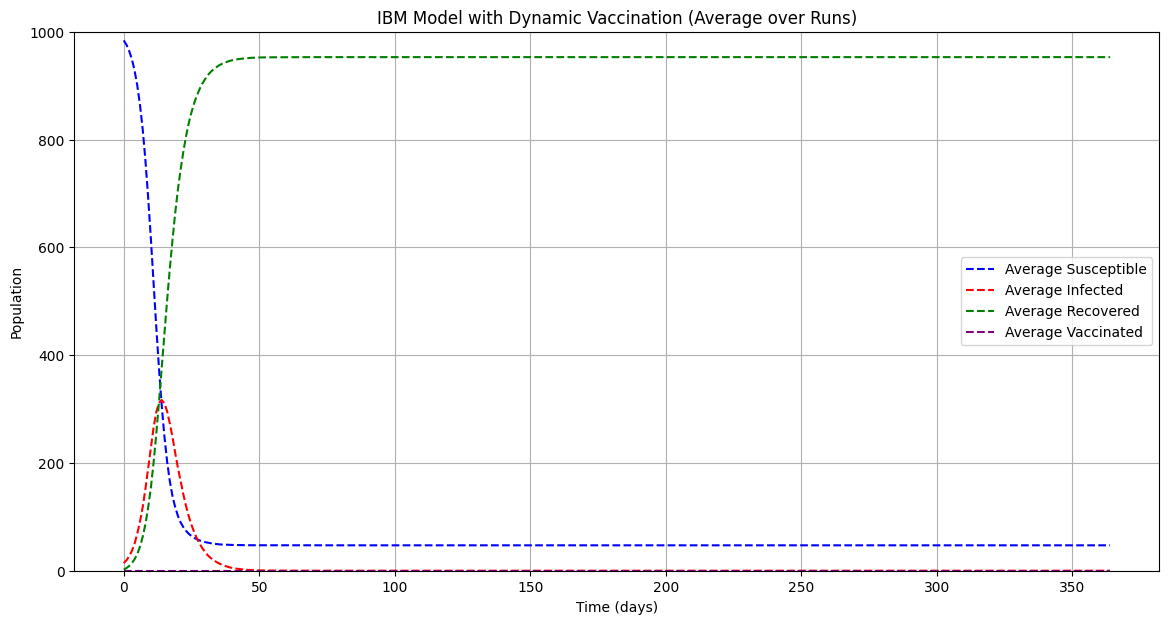

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def ibm_vaccine_simulation_multi(N, initial_infected, base_vaccination_rate, timesteps, num_runs=100):
    total_S, total_I, total_R, total_V = np.zeros(timesteps), np.zeros(timesteps), np.zeros(timesteps), np.zeros(timesteps)

    for run in range(num_runs):
        # Initial number of vaccinated individuals
        vaccinated = int(N * base_vaccination_rate)
        susceptible, infected, recovered = N - initial_infected - vaccinated, initial_infected, 0

        for time in range(timesteps):
            # Simulate infection and recovery
            infection_probability = 0.6 / N
            recovery_rate = 0.2
            new_infections = np.random.binomial(susceptible, infection_probability * infected)
            new_recoveries = np.random.binomial(infected, recovery_rate)

            # Determine the number of new vaccinations for this timestep
            # New vaccinations depend on the remaining susceptible population and a fluctuation factor
            fluctuation_factor = random.uniform(0.5, 1.5)
            new_vaccinations = int(fluctuation_factor * base_vaccination_rate * susceptible)

            # Update counts
            susceptible -= new_infections + new_vaccinations
            infected += new_infections - new_recoveries
            recovered += new_recoveries
            vaccinated += new_vaccinations

            # Accumulate data
            total_S[time] += susceptible
            total_I[time] += infected
            total_R[time] += recovered
            total_V[time] += vaccinated

    # Calculate the averages
    avg_S = total_S / num_runs
    avg_I = total_I / num_runs
    avg_R = total_R / num_runs
    avg_V = total_V / num_runs

    return avg_S, avg_I, avg_R, avg_V

# Parameters
N = 1000
initial_infected = 10
base_vaccination_rate = 0  # Daily vaccination rate as a percentage of the susceptible population
timesteps = 365  # One year
num_runs = 100

# Run the simulation
avg_S, avg_I, avg_R, avg_V = ibm_vaccine_simulation_multi(N, initial_infected, base_vaccination_rate, timesteps, num_runs)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(avg_S, 'blue', label='Average Susceptible', linestyle='--')
plt.plot(avg_I, 'red', label='Average Infected',linestyle='--')
plt.plot(avg_R, 'green', label='Average Recovered', linestyle='--')
plt.plot(avg_V, 'purple', label='Average Vaccinated', linestyle='--')
plt.title('IBM Model with Dynamic Vaccination (Average over Runs)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.ylim(0, N)
plt.grid(True)
plt.show()


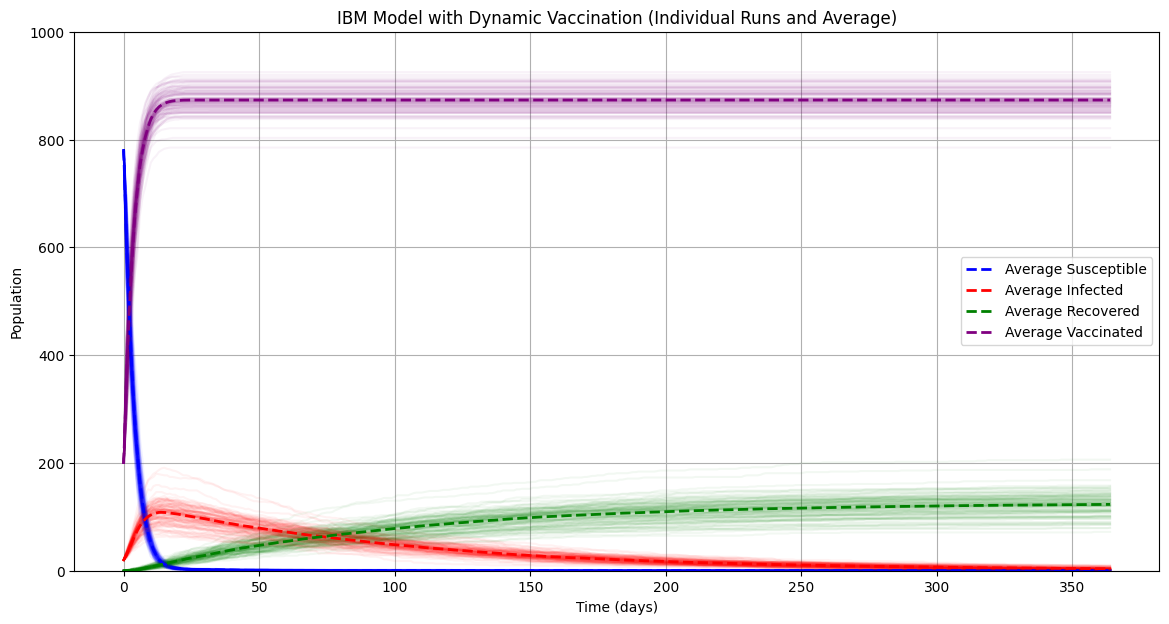

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def ibm_vaccine_simulation_multi(N, initial_infected, base_vaccination_rate, timesteps, num_runs=100):
    # Arrays to store summed data across all runs
    total_S, total_I, total_R, total_V = np.zeros(timesteps), np.zeros(timesteps), np.zeros(timesteps), np.zeros(timesteps)

    # Create a figure for plotting
    plt.figure(figsize=(14, 7))

    for run in range(num_runs):
        vaccinated = int(N * base_vaccination_rate)
        susceptible = N - initial_infected - vaccinated
        infected = initial_infected
        recovered = 0

        S, I, R, V = [susceptible], [infected], [recovered], [vaccinated]

        for time in range(1, timesteps):
            infection_probability = 0.6 / N
            recovery_rate = 0.01
            new_infections = np.random.binomial(susceptible, infection_probability * infected)
            new_recoveries = np.random.binomial(infected, recovery_rate)

            # Calculate potential new vaccinations without exceeding the susceptible count
            potential_new_vaccinations = random.uniform(0.5, 1.5) * base_vaccination_rate * susceptible
            new_vaccinations = int(min(potential_new_vaccinations, susceptible - new_infections))

            susceptible -= new_infections + new_vaccinations
            infected += new_infections - new_recoveries
            recovered += new_recoveries
            vaccinated += new_vaccinations

            S.append(susceptible)
            I.append(infected)
            R.append(recovered)
            V.append(vaccinated)

        # Plot individual runs with low alpha for visibility of variability
        plt.plot(S, color='blue', alpha=0.05)
        plt.plot(I, color='red', alpha=0.05)
        plt.plot(R, color='green', alpha=0.05)
        plt.plot(V, color='purple', alpha=0.05)

        # Accumulate state data for averaging
        total_S += np.array(S)
        total_I += np.array(I)
        total_R += np.array(R)
        total_V += np.array(V)

    # Calculate averages
    avg_S = total_S / num_runs
    avg_I = total_I / num_runs
    avg_R = total_R / num_runs
    avg_V = total_V / num_runs

    # Plot averages with thicker lines
    plt.plot(avg_S, 'blue', label='Average Susceptible', linestyle='--', linewidth=2)
    plt.plot(avg_I, 'red', label='Average Infected', linestyle='--', linewidth=2)
    plt.plot(avg_R, 'green', label='Average Recovered', linestyle='--', linewidth=2)
    plt.plot(avg_V, 'purple', label='Average Vaccinated', linestyle='--', linewidth=2)

    # Finalize plot
    plt.title('IBM Model with Dynamic Vaccination (Individual Runs and Average)')
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    plt.legend()
    plt.ylim(0, N)
    plt.grid(True)
    plt.show()

# Run the simulation with parameters
N = 1000
initial_infected = 20
base_vaccination_rate = 0.2  # Set the initial base vaccination rate
timesteps = 365  # Simulate for one year
num_runs = 100  # Perform 100 simulation runs

# Call the simulation function
ibm_vaccine_simulation_multi(N, initial_infected, base_vaccination_rate, timesteps, num_runs)
